In [28]:
import pathlib

import polars as pl
from hydra import compose, initialize
import seaborn as sns

In [29]:
with initialize(config_path="configs", version_base="1.3"):
    config = compose("cross_val", return_hydra_config=True)

In [36]:
exp_dir = pathlib.Path(config.hydra.sweep.dir)

In [38]:
files = list(exp_dir.rglob("cv_res.csv"))

In [39]:
dataframes = []

for file in files:
    dataframes.append(pl.read_csv(file))

In [40]:
cv_res = pl.concat(dataframes)
del dataframes

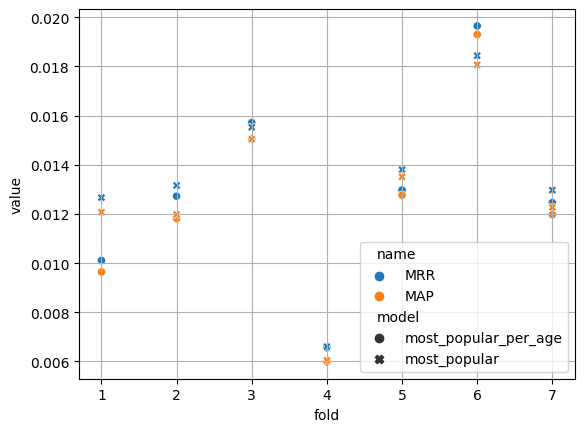

In [43]:
ax = sns.scatterplot(cv_res.filter(pl.col("name").is_in(["MRR", "MAP"])), x="fold", y="value", hue="name", style="model")
ax.grid(True)